Sustainable Lifestyle Rating Analysis
=====================================

Sustainability is not just a buzzword; it's a necessity for our planet's future. This dataset provides a fascinating glimpse into how different lifestyle choices impact sustainability ratings. Let's dive in and see what insights we can uncover. If you find this notebook useful, please consider upvoting it.


In [77]:
# !pip install joblib

# Import Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading & Exploring Data

In [88]:
# Load Data

data = pd.read_csv('lifestyle_sustainability_data.csv')


In [90]:
data.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

# Data Cleaning

In [95]:
data.isnull().sum()

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

In [97]:
# Filling missing values

data['CommunityInvolvement'].fillna(data['CommunityInvolvement'].mode()[0], inplace=True)
data['PhysicalActivities'].fillna(data['PhysicalActivities'].mode()[0], inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_30576\1397396996.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CommunityInvolvement'].fillna(data['CommunityInvolvement'].mode()[0], inplace=True)
C:\Users\suraj\AppData\Local\Temp\ipykernel_30576\1397396996.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [99]:
data.isnull().sum()

ParticipantID                    0
Age                              0
Location                         0
DietType                         0
LocalFoodFrequency               0
TransportationMode               0
EnergySource                     0
HomeType                         0
HomeSize                         0
ClothingFrequency                0
SustainableBrands                0
EnvironmentalAwareness           0
CommunityInvolvement             0
MonthlyElectricityConsumption    0
MonthlyWaterConsumption          0
Gender                           0
UsingPlasticProducts             0
DisposalMethods                  0
PhysicalActivities               0
Rating                           0
dtype: int64

In [103]:
# List of categorical columns

categories = {
    'Location': ['Urban', 'Suburban', 'Rural'],
    'DietType': ['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based'],
    'LocalFoodFrequency': ['Often', 'Sometimes', 'Rarely', 'Always'],
    'TransportationMode': ['Bike', 'Public Transit', 'Car', 'Walk'],
    'EnergySource': ['Renewable', 'Mixed', 'Non-Renewable'],
    'HomeType': ['Apartment', 'House', 'Other'],
    'ClothingFrequency': ['Rarely', 'Sometimes', 'Often', 'Always'],
    'CommunityInvolvement': ['High', 'Moderate', 'Low'],
    'Gender': ['Female', 'Male', 'Non-Binary', 'Prefer not to say'],
    'UsingPlasticProducts': ['Rarely', 'Sometimes', 'Often', 'Never'],
    'DisposalMethods': ['Composting', 'Recycling', 'Landfill', 'Combination'],
    'PhysicalActivities': ['High', 'Moderate', 'Low']
}

# Encoding Categorical Variables

label_encoders = {}

for column, classes in categories.items():
    le = LabelEncoder()
    le.classes_ = np.array(classes)  # Assign predefined classes
    if column in data.columns:  # Fit and transform only if column exists in the dataset
        data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the encoder

In [105]:
# Save LabelEncoders
joblib.dump(label_encoders, "label_encoders.joblib")
print("Label encoders saved as 'label_encoders.joblib'.")

Label encoders saved as 'label_encoders.joblib'.


In [107]:
data.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,2,2,1,0,2,0,800,2,True,5,0,100,1500,0,2,1,0,5
1,2,28,1,0,3,2,0,1,1500,3,True,4,2,250,3000,1,3,3,2,4
2,3,65,0,1,2,1,1,1,2500,1,False,2,1,400,4500,1,1,2,1,1
3,4,42,2,2,1,3,2,0,950,3,True,4,2,150,2000,0,2,3,0,5
4,5,31,1,0,3,2,0,1,1800,1,True,3,1,300,3500,2,3,0,2,3


# EDA (Exploratory Data Analysis)

Correlation Heatmap
-------------------
Let's visualize the correlation between numeric variables using a heatmap.

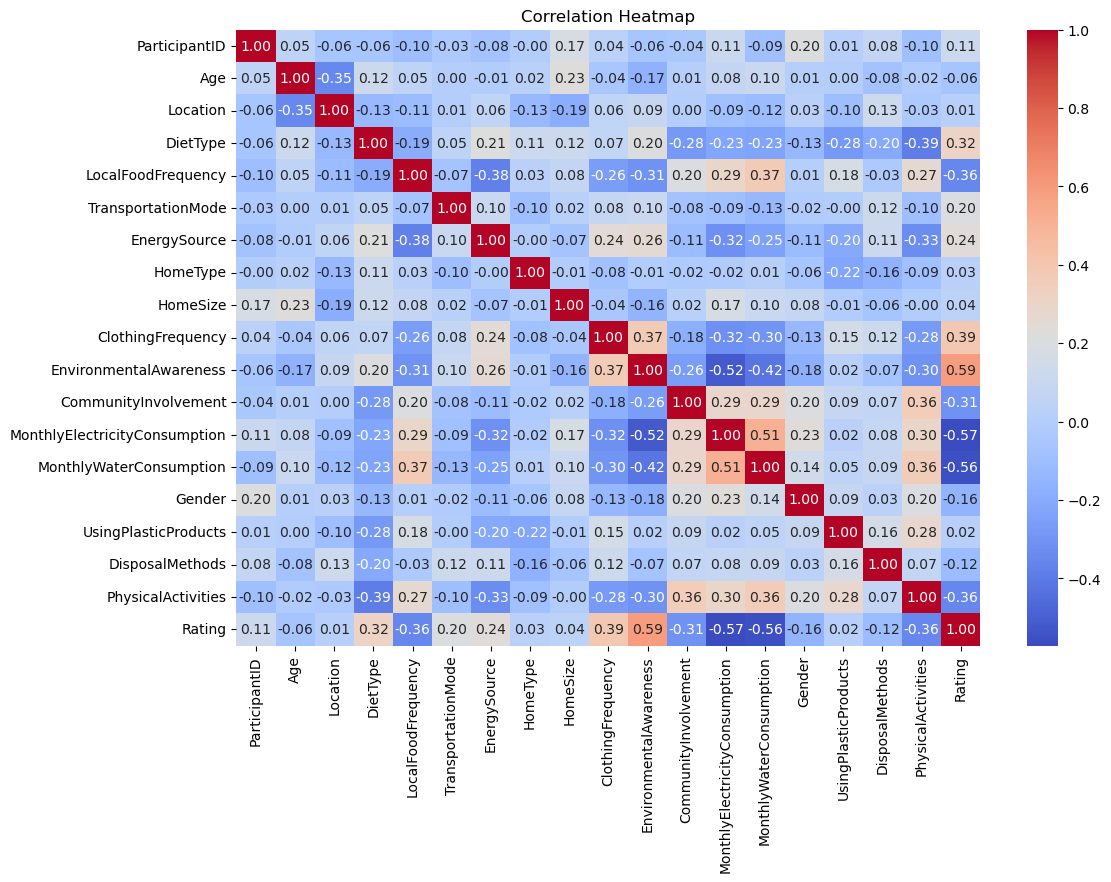

In [111]:
# Correlation heatmap

numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Distribution of Ratings
-----------------------
Let's see how the sustainability ratings are distributed.

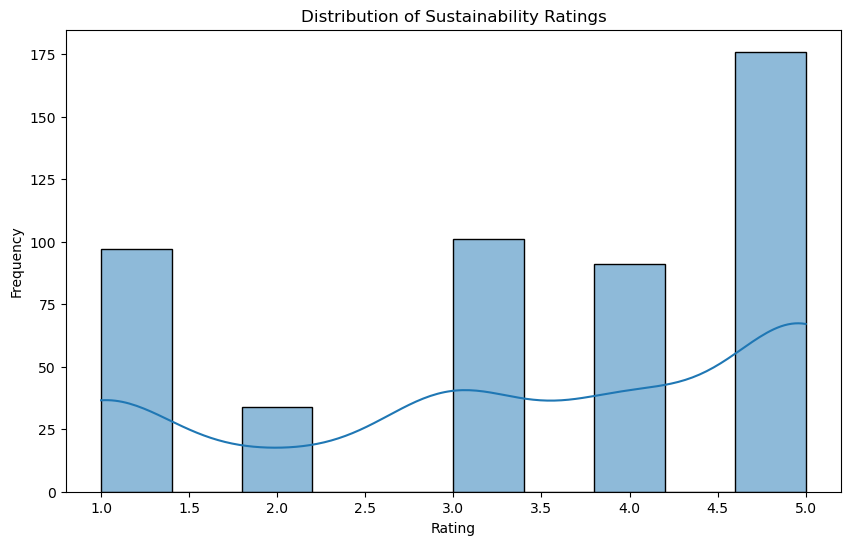

In [114]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of Sustainability Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [117]:
# Pair plot to check relations

# sns.pairplot(data)
# plt.show()

# Data Preprocessing

In [121]:
X = data.drop(columns=['ParticipantID', 'Rating'])
y = data['Rating']


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [127]:
# Save the scaler
joblib.dump(scaler, "scaler.joblib")
print("Scaler saved as 'scaler.joblib'.")

Scaler saved as 'scaler.joblib'.


# Model Development

### Model Development - Decision Tree

In [131]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [133]:
y_pred_dt = dt_model.predict(X_test)


### Model Evaluation - Decision Tree

In [136]:
# Accuracy Score for DT

accuracy_score(y_test, y_pred_dt)

0.65

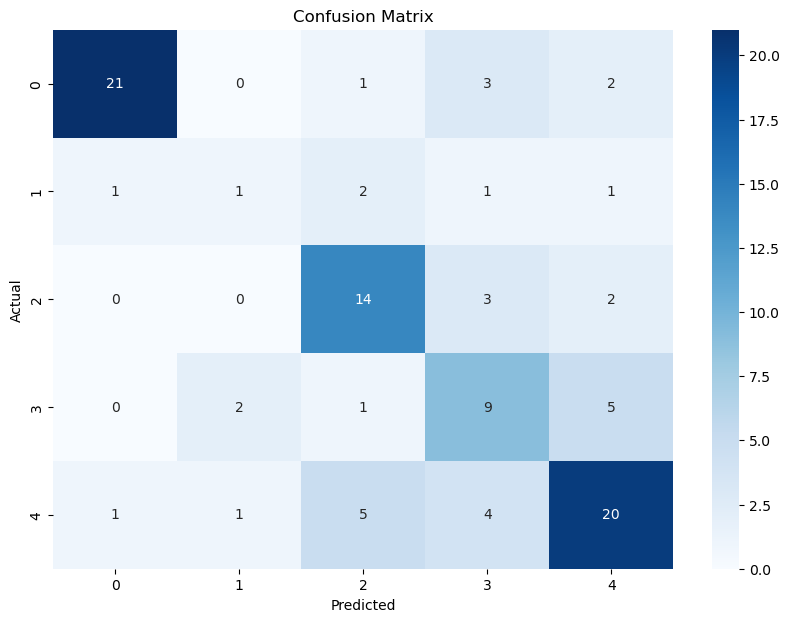

              precision    recall  f1-score   support

           1       0.91      0.78      0.84        27
           2       0.25      0.17      0.20         6
           3       0.61      0.74      0.67        19
           4       0.45      0.53      0.49        17
           5       0.67      0.65      0.66        31

    accuracy                           0.65       100
   macro avg       0.58      0.57      0.57       100
weighted avg       0.66      0.65      0.65       100



In [138]:
# Confusion Matrix for RF

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_dt))

### Model Development - Random Forest


In [141]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
y_pred_rf = rf_model.predict(X_test)


### Model Evaluation - Random Forest

In [146]:
# Accuracy Score for RF

accuracy_score(y_test, y_pred_rf)

0.74

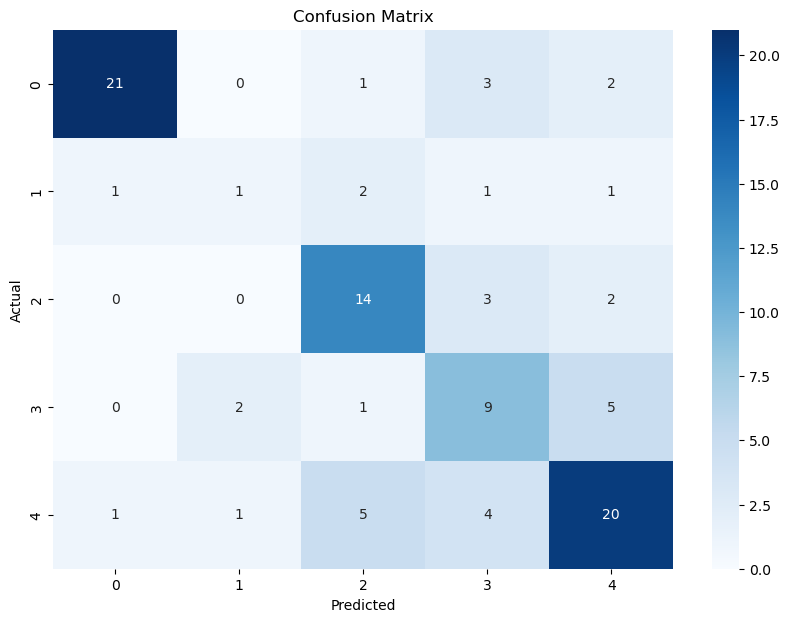

              precision    recall  f1-score   support

           1       0.96      0.93      0.94        27
           2       0.67      0.33      0.44         6
           3       0.78      0.74      0.76        19
           4       0.57      0.47      0.52        17
           5       0.64      0.81      0.71        31

    accuracy                           0.74       100
   macro avg       0.72      0.65      0.68       100
weighted avg       0.74      0.74      0.73       100



In [148]:
# Confusion Matrix for RF

cm_rf = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_rf))

# Hyperparameter Tuning - Random Forest

In [151]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [153]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [154]:
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.75


In [155]:
# Save the best model
import joblib

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'tuned_random_forest_model.joblib')
print("Model saved as 'tuned_random_forest_model.joblib'")

Model saved as 'tuned_random_forest_model.joblib'


# Future Analysis
---------------
There are many avenues for future analysis. For instance, we could explore the impact of specific lifestyle choices on sustainability ratings in more detail. What do you think would be useful to investigate further?